#  ..  Comparación SPI - SPEI

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)
simplefilter(action="ignore", category=FutureWarning)

In [3]:
'''Leer el contenido de un directorio en base a una escala de SPI/SPEI'''
def leer_dir(escala, path='../datos/3.0.spi_spei/'):
    with os.scandir(path) as ficheros:
        ficheros = [fichero.name for fichero in ficheros if fichero.is_file() 
                    and fichero.name.endswith(str(escala)+'.csv')]
    ficheros.sort()
    return ficheros

'''Leer los archivos CSV de los indices'''
def leer_csv (archivo, ruta = '../datos/3.0.spi_spei/'):
    data = pd.read_csv(ruta + archivo,  sep = ',', parse_dates=True)
    return data

'''Llevar la  fecha a índice, configurar como periodo y eliminar los NA'''
def procesa_datos(archivo, meses):
    data = leer_csv(archivo)
    data['fecha'] = pd.to_datetime(data['fecha'])
    data = data.dropna()
    data = data.tail(meses)
    data = data.reset_index(drop=True)
    return data

def plot_grafica_esta(lista_esc, est, nom_est, meses = 24):
    plt.subplots(1, len(lista_esc), sharey='row', figsize=(20,4))
    plt.suptitle('Estación '+nom_est.capitalize()+' - '+str(est), fontsize=25, color = 'darkblue', weight='bold')  
    spicol = str(est)
    speicol = str(est)  
    for lista in lista_esc:
        plt.subplot(1, len(lista_esc), lista_esc.index(lista)+1)
        for l in lista:
            data = procesa_datos(l, meses)
            if (l.count('spi')): 
                plt.plot(data['fecha'],data[spicol], label = 'SPI'+(''.join([n for n in l if n.isdigit()])))
            else: 
                plt.plot(data['fecha'],data[speicol], label = 'SPEI'+(''.join([n for n in l if n.isdigit()])))
       
        plt.xticks(rotation = 45, fontsize=12)
        plt.yticks(fontsize=15)
        plt.xlabel("Periodo", color='black', weight='bold', size = 20, labelpad = 6)
        if lista_esc.index(lista) == 0:
            plt.ylabel("SPI - SPEI", color='black', weight='bold', size = 15, labelpad = 6)
        plt.legend(fontsize=10)
        plt.axhline(y=0, color='red')
        

def lista_archivo_esc(lista):
    lista_archivos = []
    for i in lista:
        lista_archivos.append(leer_dir(i))
    return lista_archivos

In [4]:
'''cargar archivos con datos de cluster'''
estaciones = pd.read_csv('../datos/1.0.Estaciones/estaciones_senamhi_generado.csv',  sep = ',', usecols = {'id', 'estacion'})

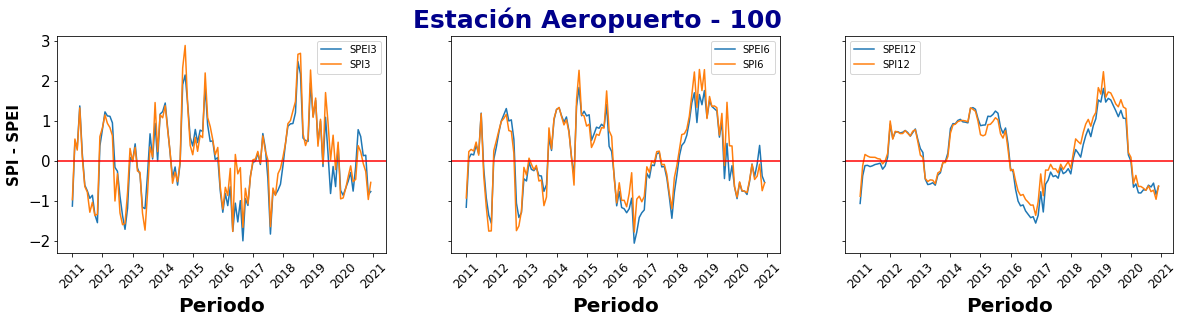

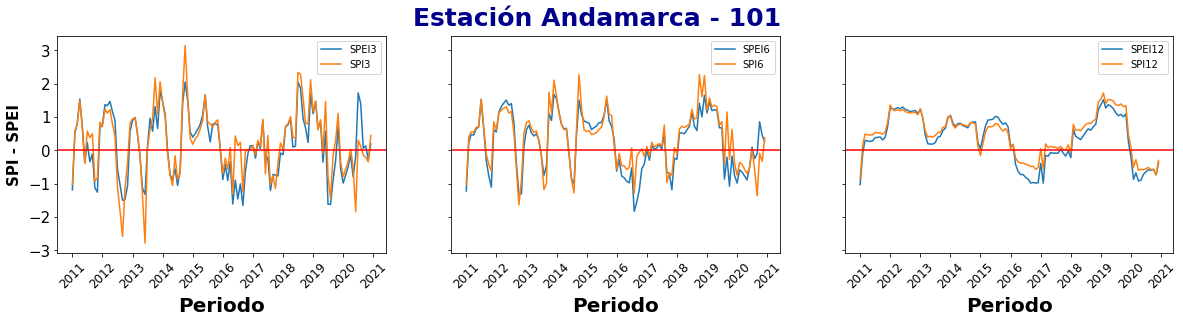

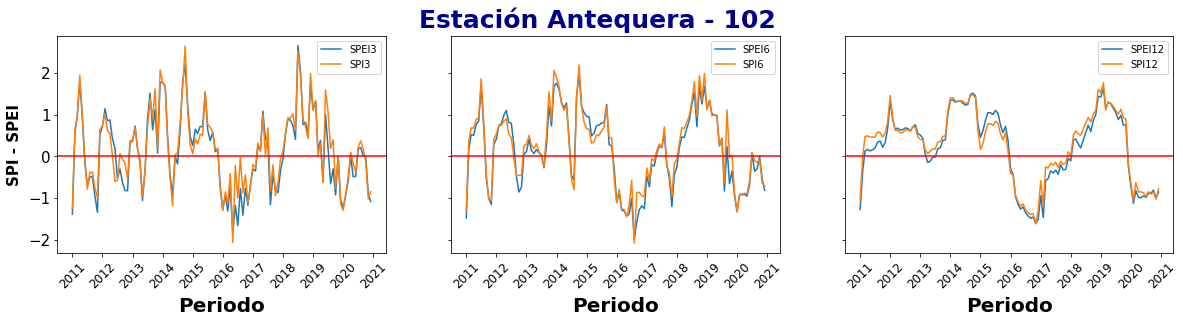

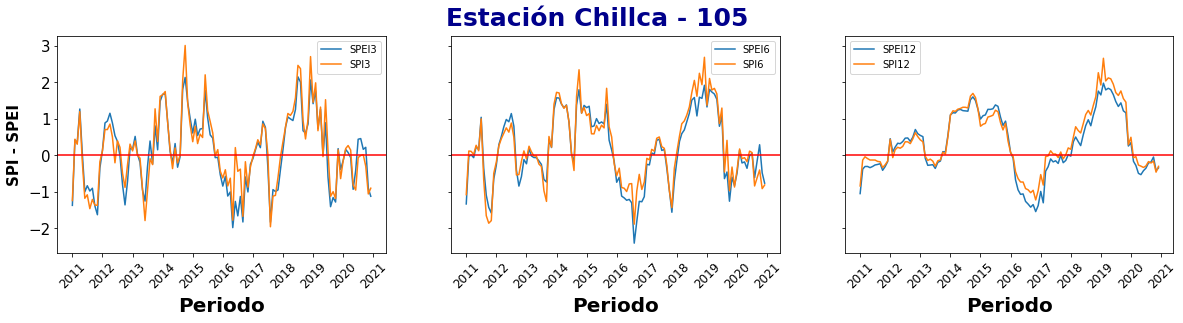

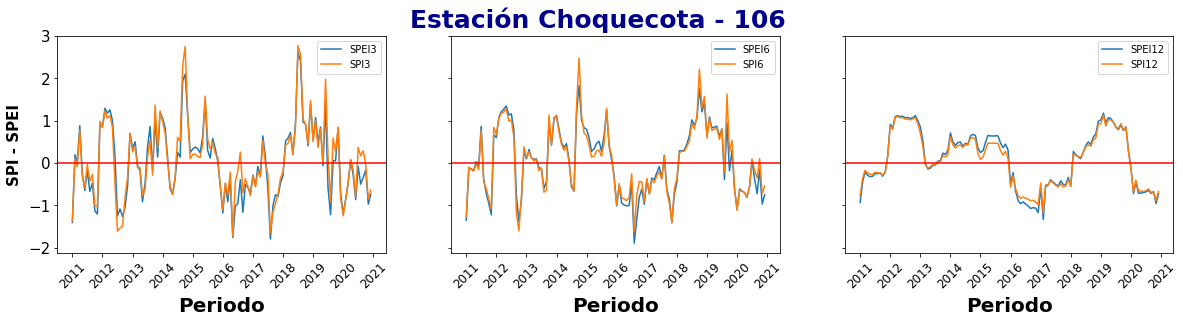

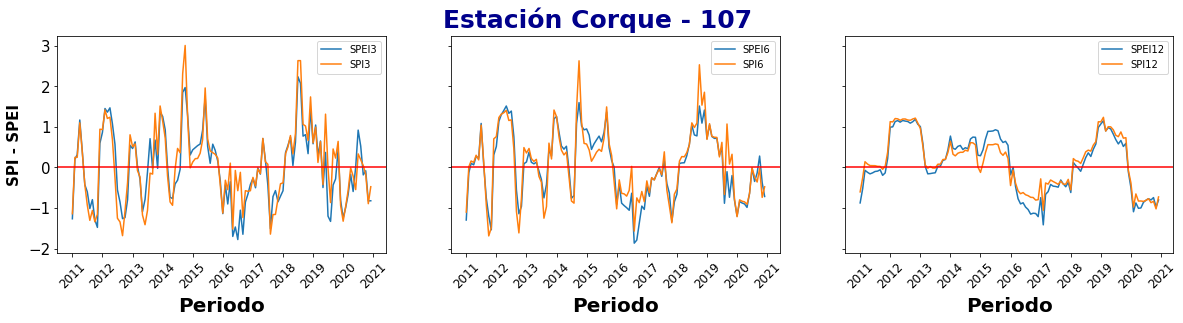

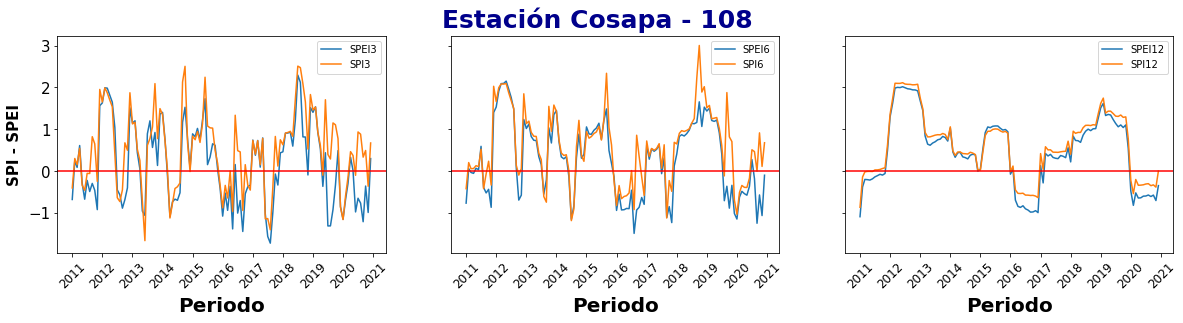

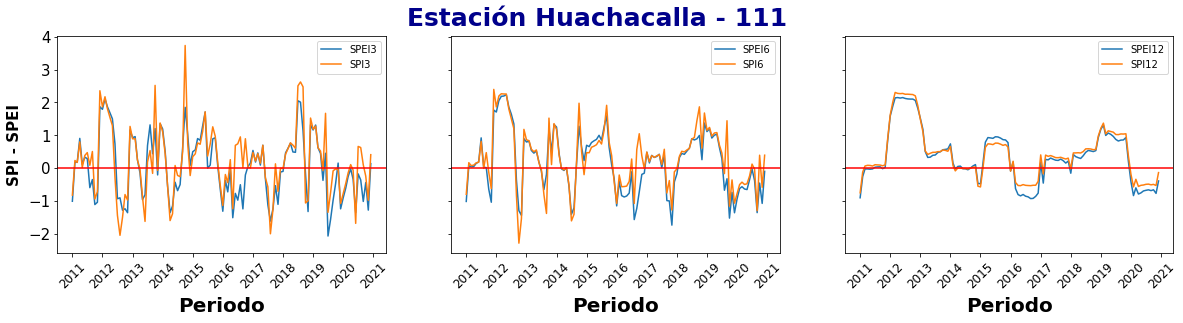

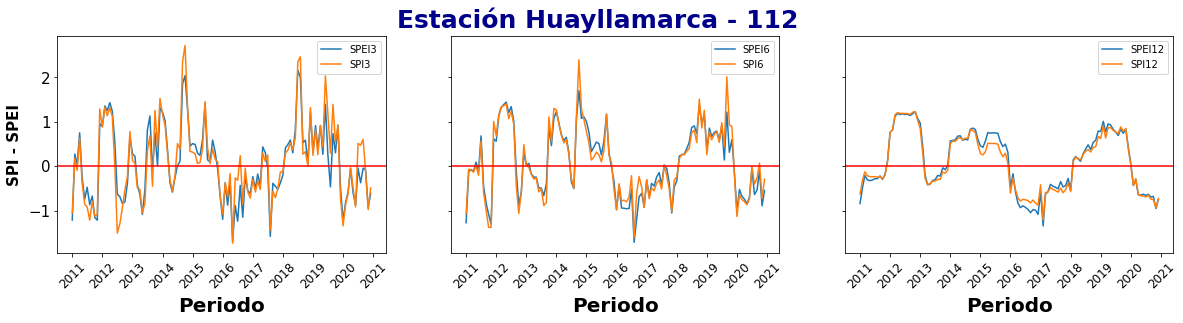

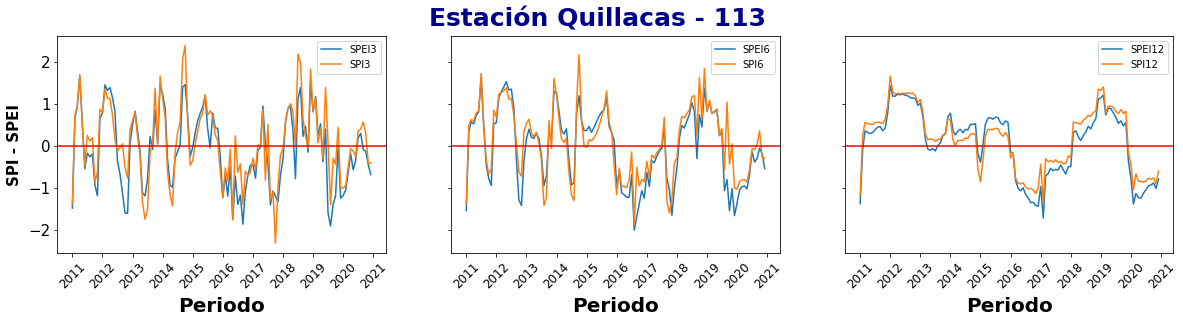

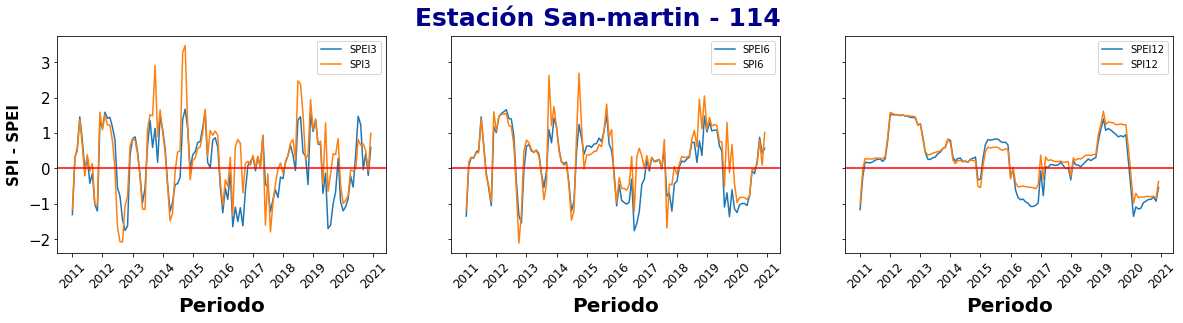

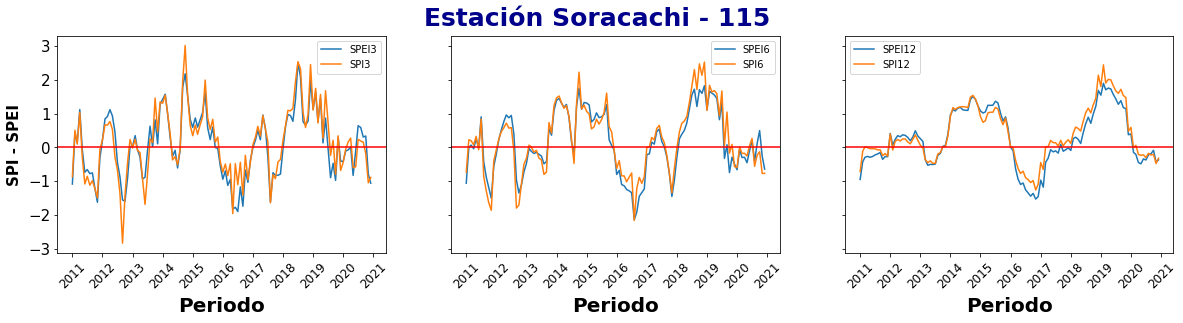

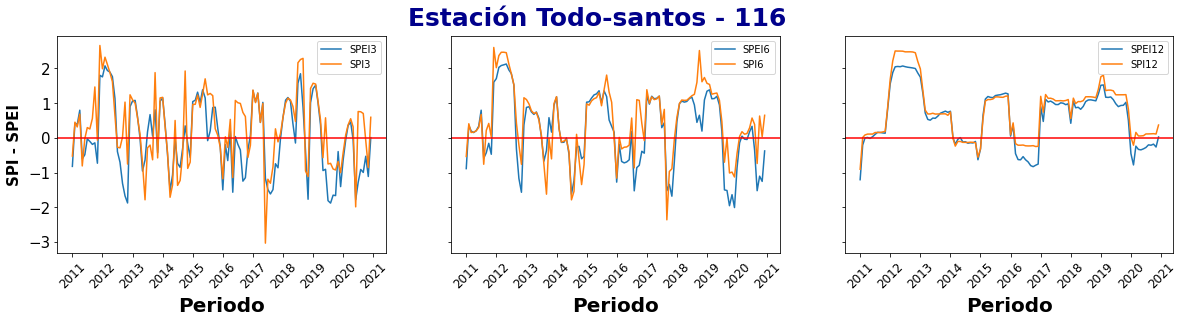

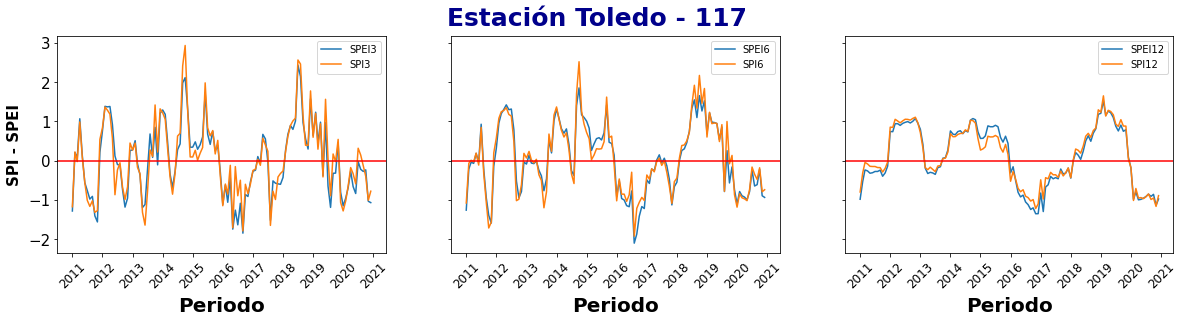

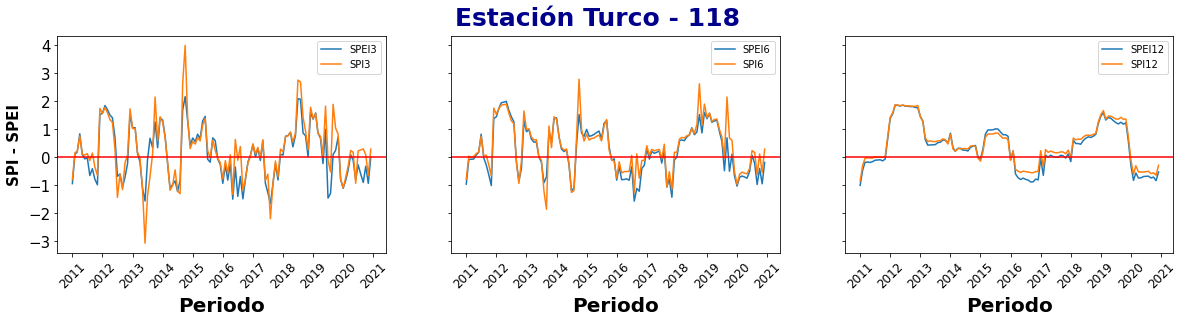

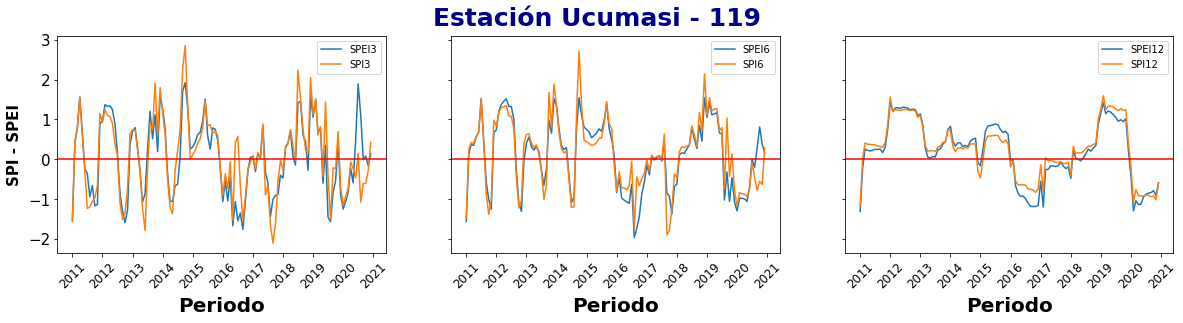

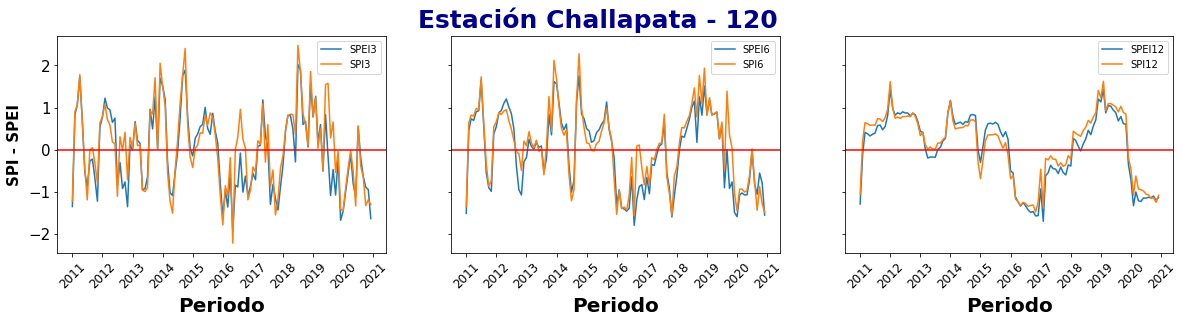

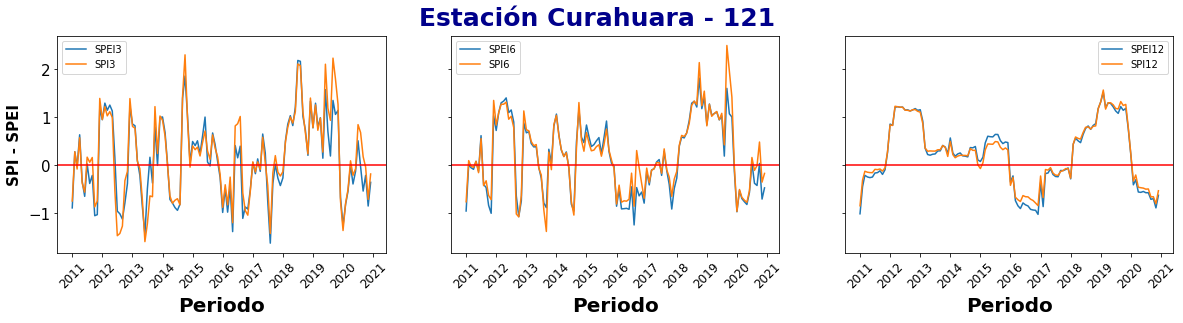

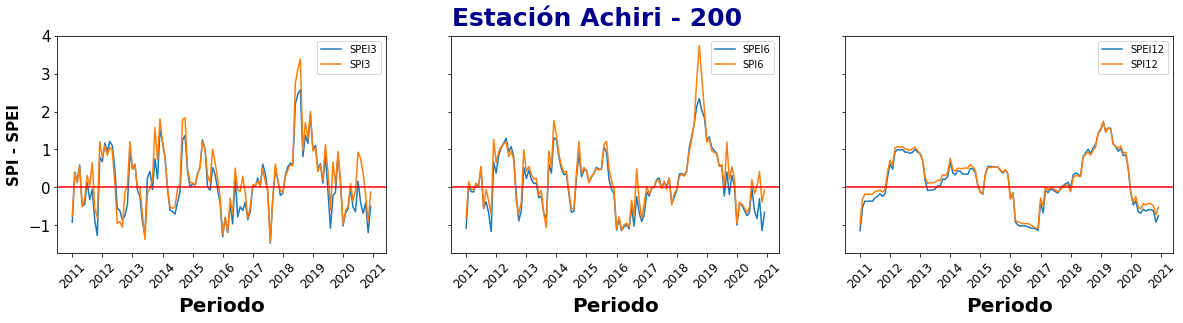

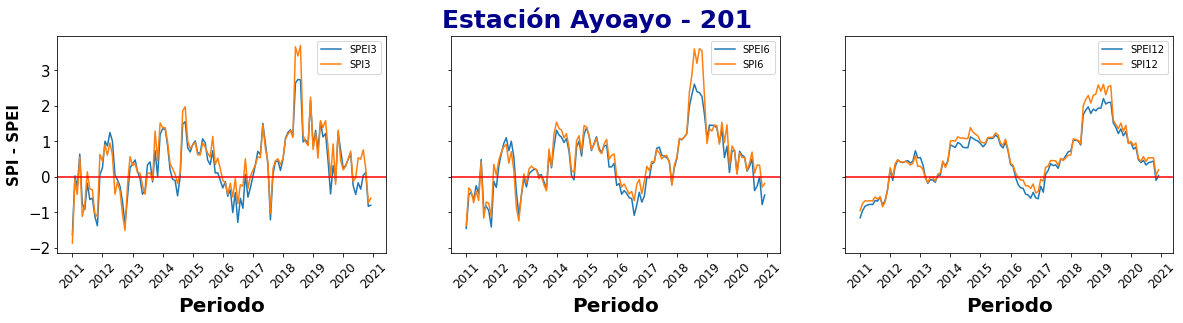

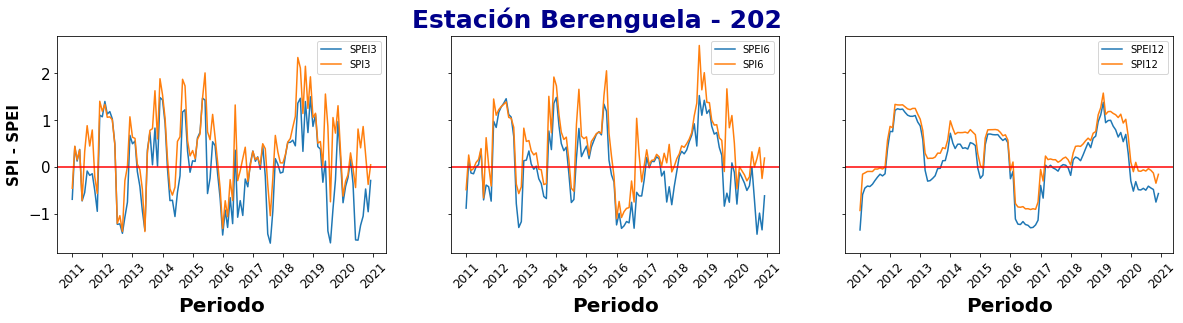

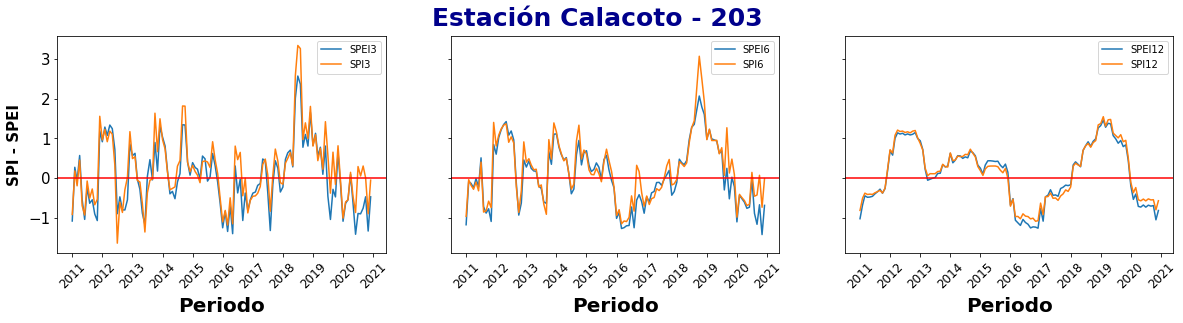

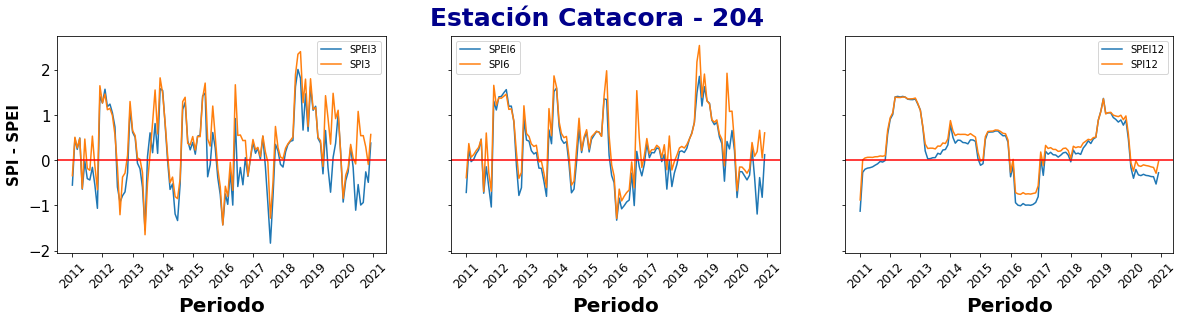

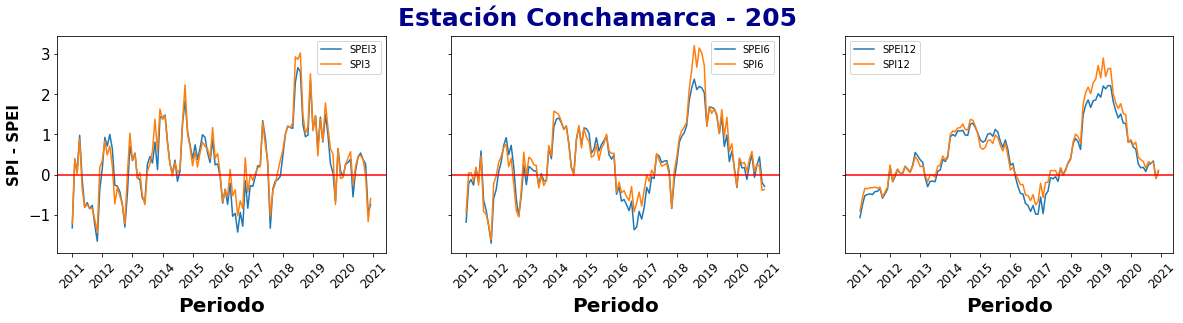

In [5]:
'''graficar SPI-SPEI por estacion'''
lista_arch = lista_archivo_esc([3,6,12])
for e in range(estaciones.shape[0]):
    plot_grafica_esta(lista_arch, estaciones.iloc[e,0],estaciones.iloc[e,1], 120)

    